In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [61]:
### Create column names ###
def exportColName():
    handColName=['hand_temp', 'hand_acc16g_x', 'hand_acc16g_y', 'hand_acc16g_z', 'hand_acc6g_x', 'hand_acc6g_y', 'hand_acc6g_z', 
             'hand_gyro_x', 'hand_gyro_y', 'hand_gyro_z', 'hand_mag_x', 'hand_mag_y', 'hand_mag_z', 'hand_ori_0', 'hand_ori_1', 
             'hand_ori_2', 'hand_ori_3']
    chestColName=['chest_temp', 'chest_acc16g_x', 'chest_acc16g_y', 'chest_acc16g_z', 'chest_acc6g_x', 'chest_acc6g_y', 
                  'chest_acc6g_z', 'chest_gyro_x', 'chest_gyro_y', 'chest_gyro_z', 'chest_mag_x', 'chest_mag_y', 'chest_mag_z', 
                  'chest_ori_0', 'chest_ori_1', 'chest_ori_2', 'chest_ori_3']
    ankleColName=['ankle_temp', 'ankle_acc16g_x', 'ankle_acc16g_y', 'ankle_acc16g_z', 'ankle_acc6g_x', 'ankle_acc6g_y', 
                  'ankle_acc6g_z', 'ankle_gyro_x', 'ankle_gyro_y', 'ankle_gyro_z', 'ankle_mag_x', 'ankle_mag_y', 'ankle_mag_z', 
                  'ankle_ori_0', 'ankle_ori_1', 'ankle_ori_2', 'ankle_ori_3']
    return ['timestamp', 'activityID', 'heart_rate']+handColName+chestColName+ankleColName


### Load a single subject file & Return a dataframe ###
# subjectIndex=1,2,3...9
def loadSubject(subjectIndex):
    filename="PAMAP2_Dataset/Protocol/subject10"+str(subjectIndex)+".dat"
    col=exportColName()
    return pd.read_csv(filename, sep=' ', header=None, names=col)


### Load all subject files & Return a dataframe ###
def loadAllSubjects():
    allData=loadSubject(1)
    col=exportColName()
    for i in range(2, 10):
        filename="PAMAP2_Dataset/Protocol/subject10"+str(i)+".dat"
        tempData=pd.read_csv(filename, sep=' ', header=None, names=col)
        allData=allData.append(tempData)
        
    allData=allData.reset_index(drop=True)
    return allData
    

colName=exportColName()

### Load Data:

In [3]:
data=loadSubject(1)

In [4]:
data.tail()

,timestamp,activityID,heart_rate,hand_temp,hand_acc16g_x,hand_acc16g_y,hand_acc16g_z,hand_acc6g_x,hand_acc6g_y,hand_acc6g_z,...,ankle_gyro_x,ankle_gyro_y,ankle_gyro_z,ankle_mag_x,ankle_mag_y,ankle_mag_z,ankle_ori_0,ankle_ori_1,ankle_ori_2,ankle_ori_3
376412,3772.50,0,NaN,30.5,2.02477,7.29553,5.74194,2.06573,6.57692,5.92695,...,0.048745,-0.008034,0.018600,-58.8381,-36.2397,-11.0980,1.0,0.0,0.0,0.0
376413,3772.51,0,NaN,30.5,2.10836,7.86504,5.85674,2.08754,7.42244,5.87977,...,0.042113,0.024647,0.013375,-58.9537,-36.3379,-11.7170,1.0,0.0,0.0,0.0
376414,3772.52,0,NaN,30.5,2.07163,8.39581,5.77742,2.13833,8.05640,5.90853,...,-0.014889,0.026009,0.025054,-59.1781,-35.8985,-10.9678,1.0,0.0,0.0,0.0
376415,3772.53,0,NaN,30.5,2.19569,8.77634,6.00892,2.11251,8.53989,5.93770,...,0.047026,-0.035531,0.024640,-58.8299,-36.6845,-10.8553,1.0,0.0,0.0,0.0
376416,3772.54,0,NaN,30.5,2.14774,8.66047,5.73918,2.15810,8.59995,5.92242,...,0.042585,0.017541,-0.037894,-59.1707,-36.7731,-11.5961,1.0,0.0,0.0,0.0


In [5]:
numRow, numCol=data.shape
print("number of Row:", numRow)
print("number of Column:", numCol)

number of Row: 376417
number of Column: 54


### Check the data type of each column:

In [7]:
datatype=[data[name].dtype for name in colName]
np.unique(datatype)

array([dtype('int64'), dtype('float64')], dtype=object)

### Check NaN value percentage: (NaN count)/(total row)*100%

In [9]:
data.isnull().sum()/numRow*100

timestamp          0.000000
activityID         0.000000
heart_rate        90.864121
hand_temp          0.386274
hand_acc16g_x      0.386274
hand_acc16g_y      0.386274
hand_acc16g_z      0.386274
hand_acc6g_x       0.386274
hand_acc6g_y       0.386274
hand_acc6g_z       0.386274
hand_gyro_x        0.386274
hand_gyro_y        0.386274
hand_gyro_z        0.386274
hand_mag_x         0.386274
hand_mag_y         0.386274
hand_mag_z         0.386274
hand_ori_0         0.386274
hand_ori_1         0.386274
hand_ori_2         0.386274
hand_ori_3         0.386274
chest_temp         0.135222
chest_acc16g_x     0.135222
chest_acc16g_y     0.135222
chest_acc16g_z     0.135222
chest_acc6g_x      0.135222
chest_acc6g_y      0.135222
chest_acc6g_z      0.135222
chest_gyro_x       0.135222
chest_gyro_y       0.135222
chest_gyro_z       0.135222
chest_mag_x        0.135222
chest_mag_y        0.135222
chest_mag_z        0.135222
chest_ori_0        0.135222
chest_ori_1        0.135222
chest_ori_2        0

### Timestamp:
#### Is timestamp unique?

In [10]:
len(data['timestamp'].unique())==numRow

True

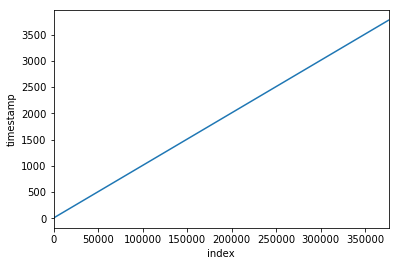

In [19]:
plt.figure()
plt.xlabel('index')
plt.ylabel('timestamp')
data['timestamp'].plot(kind='line');

#### Double check: Timestamp should be ascending

In [32]:
np.all(np.array(data['timestamp'][1:])>np.array(data['timestamp'][:-1]))

True

### Time spent on each activity:

In [43]:
subCol=['timestamp','activityID','heart_rate','hand_temp','chest_temp','ankle_temp']
activityAgg=pd.DataFrame(data, columns=subCol).groupby('activityID').count()
activityAgg

,timestamp,heart_rate,hand_temp,chest_temp,ankle_temp
activityID,,,,,
0,126460,11543,126364,126277,126231
1,27187,2486,27184,27185,27184
2,23480,2146,23471,23478,23476
3,21717,1984,21681,21704,21642
4,22253,2035,21602,22082,22185
5,21265,1941,21007,21200,20999
6,23575,2156,23527,23572,23543
7,20265,1852,20173,20236,20174
12,15890,1452,15881,15888,15886


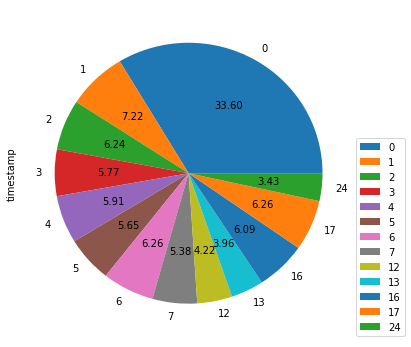

In [57]:
activityAgg['timestamp'].plot(kind='pie', autopct='%.2f', figsize=[6,6])
plt.legend(loc=(1,0), labels=activityAgg.index);

### Data labeled with activityID=0 is should be discarded according to the data description.

In [86]:
nonZeroData=data.loc[lambda df: df.activityID>0, :].reset_index(drop=True)
nonZeroData.tail()

,timestamp,activityID,heart_rate,hand_temp,hand_acc16g_x,hand_acc16g_y,hand_acc16g_z,hand_acc6g_x,hand_acc6g_y,hand_acc6g_z,...,ankle_gyro_x,ankle_gyro_y,ankle_gyro_z,ankle_mag_x,ankle_mag_y,ankle_mag_z,ankle_ori_0,ankle_ori_1,ankle_ori_2,ankle_ori_3
249952,3626.33,24,NaN,30.1875,2.51550,7.02650,5.78869,2.44962,7.57075,5.77337,...,-0.018273,0.000864,0.018507,-56.3324,-29.6397,34.1311,1.0,0.0,0.0,0.0
249953,3626.34,24,NaN,30.1875,2.50643,6.30465,5.67552,2.53332,6.84517,5.69937,...,-0.037873,-0.022418,-0.017999,-55.7786,-29.1093,34.2560,1.0,0.0,0.0,0.0
249954,3626.35,24,NaN,30.1875,2.54102,5.84908,5.67758,2.55875,6.18058,5.80651,...,0.059283,-0.050002,0.005630,-55.5371,-29.5769,35.6106,1.0,0.0,0.0,0.0
249955,3626.36,24,NaN,30.1875,2.65866,5.88715,5.79468,2.57228,5.87855,5.92796,...,0.049326,-0.016209,0.016162,-56.4328,-30.1943,34.6211,1.0,0.0,0.0,0.0
249956,3626.37,24,NaN,30.1875,2.51044,6.11629,5.83017,2.58812,5.95396,5.94288,...,0.051950,-0.011002,-0.017655,-56.3426,-29.1916,33.6409,1.0,0.0,0.0,0.0


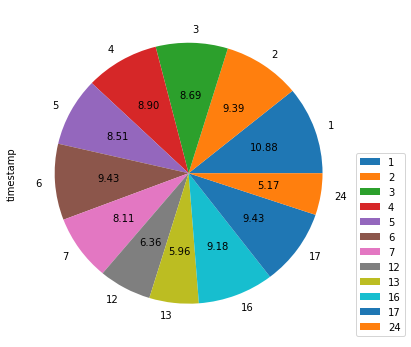

In [88]:
nonZeroActivityAgg=pd.DataFrame(nonZeroData, columns=subCol).groupby('activityID').count()
nonZeroActivityAgg['timestamp'].plot(kind='pie', autopct='%.2f', figsize=[6,6])
plt.legend(loc=(1,0), labels=nonZeroActivityAgg.index);

## Explore the data a little bit:

### Average hand/chest/ankle temperature and heart rate

In [94]:
subCol=['activityID','heart_rate','hand_temp','chest_temp','ankle_temp']
df=pd.DataFrame(nonZeroData, columns=subCol).groupby('activityID').mean()
df

,heart_rate,hand_temp,chest_temp,ankle_temp
activityID,,,,
1,87.528158,31.286842,33.079777,31.695278
2,91.183131,32.307973,34.033507,32.718130
3,103.425907,32.938840,34.533248,33.301422
4,120.441278,33.203456,37.207341,34.694197
5,161.338485,30.687345,33.888906,33.167675
6,127.218460,31.633559,36.083059,33.782940
7,139.647948,32.397505,36.920544,34.181731
12,144.292011,33.789387,36.527879,34.889293
13,138.633627,33.745544,36.801060,34.892931


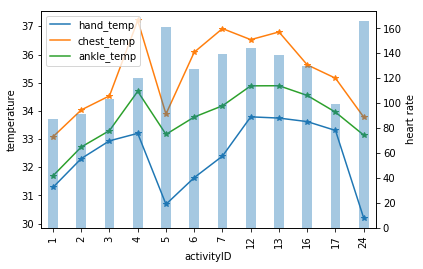

In [168]:
df1=df.reset_index()
ax=df1[['hand_temp','chest_temp','ankle_temp']].plot(kind='line', marker='*')
df1['heart_rate'].plot(kind='bar', width=w, secondary_y=True, alpha=0.4)
ax.set_xticklabels(df1.activityID)
ax.set_xlabel('activityID')
ax.set_ylabel('temperature')
ax.right_ax.set_ylabel('heart rate');

**<font style="background:#ffff99;">Note:</font>** It seems that for most of the activities, the hand/chest/ankle temperature and heart rate are positively relate. But for activities (ID=5 and 24, corresponding to running and rope jumping, respectively) that require a heart pumps very hard, those temperatures are quite low. Maybe because these activities were done outdoor, the skin was exposed to air, and the relatively fast movement of the activities lowered the temperature due to better air circulation.

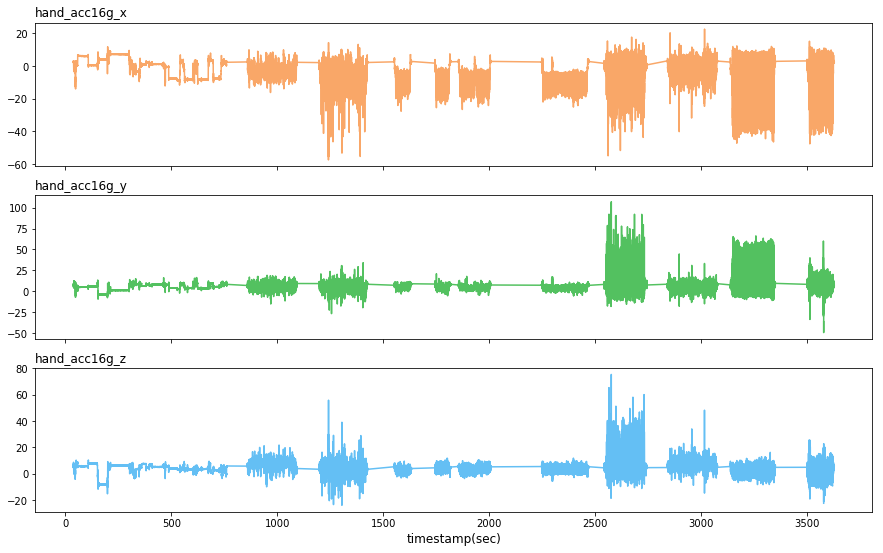

In [195]:
plt.figure(figsize=[15, 9])

ax1=plt.subplot(311)
plt.plot(nonZeroData.timestamp, nonZeroData.hand_acc16g_x, c='#f9a768')
plt.setp(ax1.get_xticklabels(), visible=False)
ax1.set_title('hand_acc16g_x', loc='left')

ax2=plt.subplot(312, sharex=ax1)
plt.plot(nonZeroData.timestamp, nonZeroData.hand_acc16g_y, c='#53c160')
plt.setp(ax2.get_xticklabels(), visible=False)
ax2.set_title('hand_acc16g_y', loc='left')

ax3=plt.subplot(313, sharex=ax1)
plt.plot(nonZeroData.timestamp, nonZeroData.hand_acc16g_z, c='#64bff4')
ax3.set_title('hand_acc16g_z', loc='left')
ax3.set_xlabel('timestamp(sec)', fontsize=12);

**<font style="background:#ffff99;">Note:</font>** We can clearly see 10 nodes from the IMU data from the participant's hand. It seems that there might be some movements occationally happened between t=10~800sec. 

### Time duration of each activity:

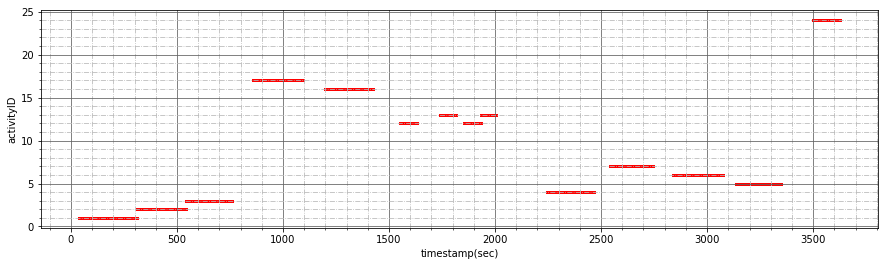

In [230]:
plt.figure(figsize=[15, 4])
plt.scatter(x=nonZeroData.timestamp, y=nonZeroData.activityID, s=4, c='r')
plt.minorticks_on()
plt.grid(which='major', axis='both', linestyle='-', color='#636363')
plt.grid(which='minor', axis='both', linestyle='-.', color='#bababa')
plt.xlabel('timestamp(sec)')
plt.ylabel('activityID');

**<font style="background:#ffff99;">Note:</font>** We can compare this graph with the acc16g-vs-timestamp graph and can easily found when each activity happened. Also, we can tell that activityID=1,2,3 are pretty relaxing or didn't require the participant move a lot.

In [240]:
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go
import plotly.offline as py
py.init_notebook_mode(connected=True)

In [255]:
def plot3DMotion(xtrace, ytrace, ztrace, title, subplotNum):
    ax=fig.add_subplot(subplotNum, projection='3d')
    ax.scatter(xtrace, ytrace, ztrace, s=3)

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set_title(title)
    

def plot3DInteract(xtrace, ytrace, ztrace):
    trace = go.Scatter3d(x=xtrace, y=ytrace, z=ztrace, mode='markers', marker=dict(size=3))
    trace = [trace]
    layout = go.Layout(margin=dict(l=0, r=0, b=0, t=0))
    py.iplot(go.Figure(data=trace, layout=layout))

In [261]:
act5Data=nonZeroData.loc[lambda df: df.activityID==5, :].reset_index(drop=True)
act5Data.head()

,timestamp,activityID,heart_rate,hand_temp,hand_acc16g_x,hand_acc16g_y,hand_acc16g_z,hand_acc6g_x,hand_acc6g_y,hand_acc6g_z,...,ankle_gyro_x,ankle_gyro_y,ankle_gyro_z,ankle_mag_x,ankle_mag_y,ankle_mag_z,ankle_ori_0,ankle_ori_1,ankle_ori_2,ankle_ori_3
0,3135.80,5,125.0,31.0,2.35845,7.70789,5.47614,2.23889,7.60248,5.77352,...,0.021771,-0.021400,-0.026497,-97.6460,7.53005,-22.1965,1.0,0.0,0.0,0.0
1,3135.81,5,NaN,31.0,2.43750,8.01115,5.51479,2.33021,7.82824,5.65212,...,-0.003141,-0.002485,-0.013782,-97.6679,8.32086,-23.5495,1.0,0.0,0.0,0.0
2,3135.82,5,NaN,31.0,2.33055,7.97577,5.70574,2.34694,8.08480,5.59114,...,-0.007850,0.007724,0.011509,-98.4394,7.67962,-23.0549,1.0,0.0,0.0,0.0
3,3135.83,5,NaN,31.0,2.32307,7.48155,5.59183,2.33172,7.85858,5.80306,...,0.030137,0.024858,-0.005560,-97.5492,8.19826,-22.9329,1.0,0.0,0.0,0.0
4,3135.84,5,NaN,31.0,2.28716,7.17933,5.70778,2.32842,7.43576,5.83420,...,0.006099,-0.006843,-0.010647,-98.1006,7.77153,-22.5616,1.0,0.0,0.0,0.0


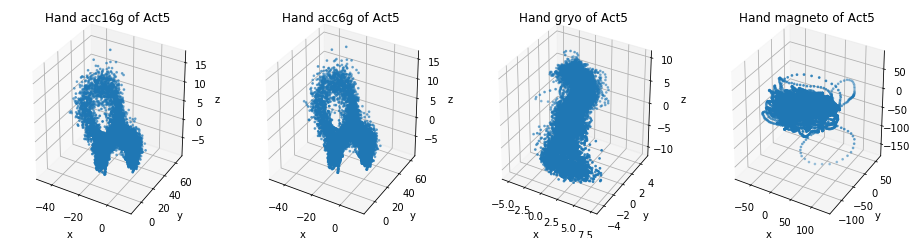

In [260]:
fig=plt.figure(figsize=[16, 4])
plot3DMotion(act5Data.hand_acc16g_x, act5Data.hand_acc16g_y, act5Data.hand_acc16g_z, 'Hand acc16g of Act5', 141)
plot3DMotion(act5Data.hand_acc6g_x, act5Data.hand_acc6g_y, act5Data.hand_acc6g_z, 'Hand acc6g of Act5', 142)
plot3DMotion(act5Data.hand_gyro_x, act5Data.hand_gyro_y, act5Data.hand_gyro_z, 'Hand gryo of Act5', 143)
plot3DMotion(act5Data.hand_mag_x, act5Data.hand_mag_y, act5Data.hand_mag_z, 'Hand magneto of Act5', 144)
plt.show()

In [262]:
act7Data=nonZeroData.loc[lambda df: df.activityID==7, :].reset_index(drop=True)

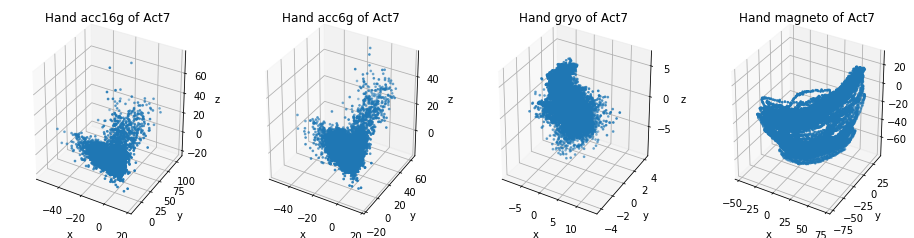

In [263]:
fig=plt.figure(figsize=[16, 4])
plot3DMotion(act7Data.hand_acc16g_x, act7Data.hand_acc16g_y, act7Data.hand_acc16g_z, 'Hand acc16g of Act7', 141)
plot3DMotion(act7Data.hand_acc6g_x, act7Data.hand_acc6g_y, act7Data.hand_acc6g_z, 'Hand acc6g of Act7', 142)
plot3DMotion(act7Data.hand_gyro_x, act7Data.hand_gyro_y, act7Data.hand_gyro_z, 'Hand gryo of Act7', 143)
plot3DMotion(act7Data.hand_mag_x, act7Data.hand_mag_y, act7Data.hand_mag_z, 'Hand magneto of Act7', 144)
plt.show()

In [264]:
plot3DInteract(act7Data.hand_mag_x, act7Data.hand_mag_y, act7Data.hand_mag_z)